# Titanic Survivor Predictions 

Load train and test data set from kaggle with pandas

In [1]:
import pandas as pd

train = pd.read_csv("/Users/Abe/Documents/DataScience/Training/kaggleTitanicPrediction/train.csv")
test = pd.read_csv("/Users/Abe/Documents/DataScience/Training/kaggleTitanicPrediction/test.csv")

## 1. Exploratory Data Analysis (EDA)

In [2]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train.info()
print("\n============ Missing Values ==============\n")
print(train.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

============ Missing Values ==============

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


### Visualize data to gain feature insights

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [6]:
def stacked_bar(feature_name):
    survived = train[train['Survived'] == 1][feature_name].value_counts()
    dead = train[train['Survived'] == 0][feature_name].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

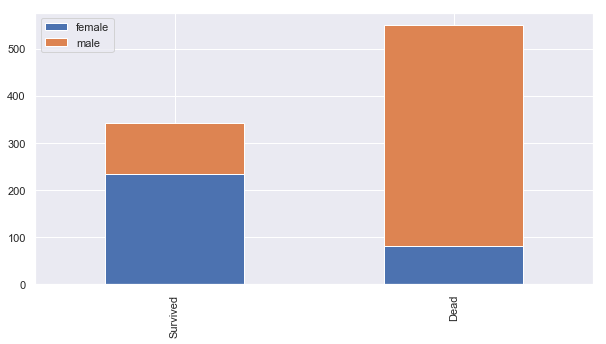

In [7]:
stacked_bar('Sex')

it seems **_Female_** has higher chance of survive than **_Male_** 

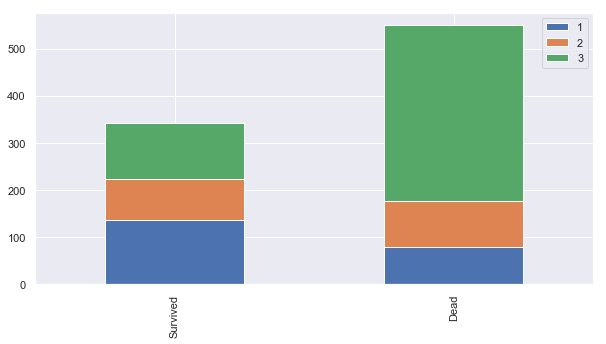

In [8]:
stacked_bar('Pclass')

**_Class1_** Passengers more likely survived than other class<br />

**_Class2_** Passengers has highest dead count

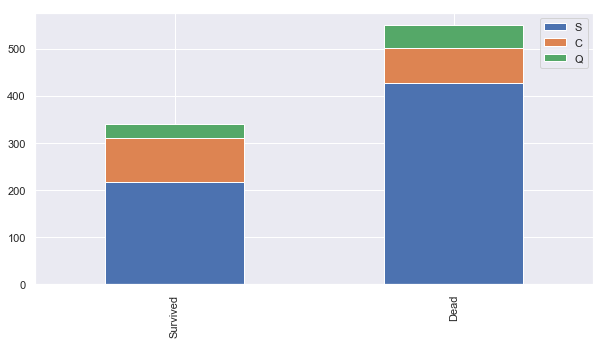

In [9]:
stacked_bar('Embarked')

People aboarded form **S** more likely dead and from __C__ slightly has chance to survived

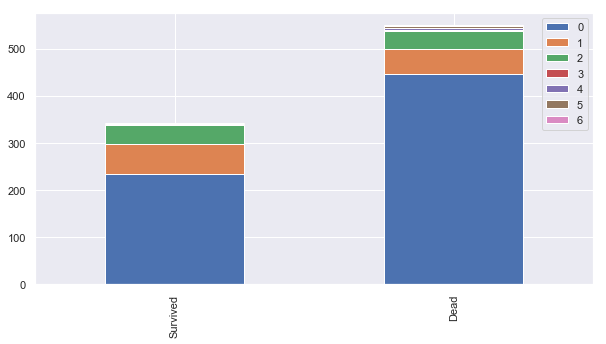

In [10]:
stacked_bar('Parch')

People aboarded __**Alone**__ more likely dead

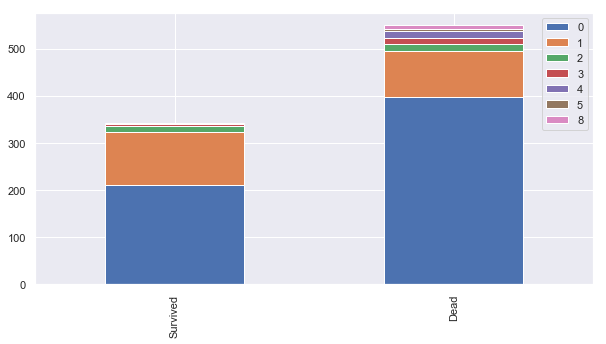

In [11]:
stacked_bar('SibSp')

People whose **siblings or spouse** > 2 more likely to survived

### Feature Engineering

Analyze features then choose some that have strong corelation with target feature or ground truth. Sometimes we might be able to extract new feature<br /> from existing features or combine several ones.<br /><br />
Transform categorical features into numeric then create **feature vector** which is an n-dimensional vector of features before fitting it into the model.

#### Extract title feature from names

In [12]:
# combining train and test dataset before extract title from name

train_test_data = [train, test] 

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [13]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Title, dtype: int64

In [14]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [15]:
#Convert categorical value of title into numeric

title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [16]:
# Drop feature name & ticket from train and test dataset

train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
test.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

In [17]:
#Convert categorical value of sex into numeric

sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

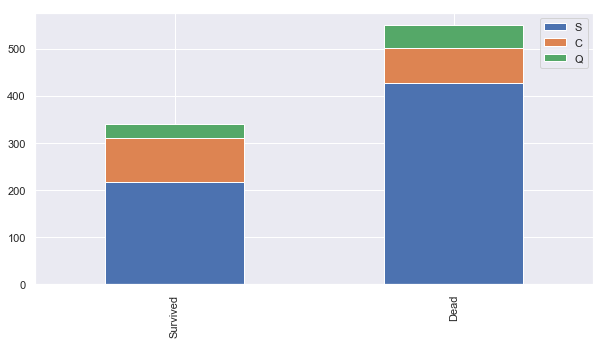

In [18]:
stacked_bar('Embarked')

#### From **Embarked** bar chart we can see that most of passenger board from S we could fill the missing values with **S**

In [19]:
train['Embarked'].fillna('S', inplace = True)
test['Embarked'].fillna('S', inplace = True)

In [20]:
#Convert categorical value of Embarked into numeric

embark_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embark_mapping)

#### Fill Age missing values with median of title categories then convert Age **numerical** into **categorical** feature

In [21]:
#fill age missing value with median value for each title

train['Age'].fillna(train.groupby("Title")["Age"].transform("median"), inplace = True)
test['Age'].fillna(test.groupby("Title")["Age"].transform("median"), inplace = True)

In [22]:
#Convert Age into Categorical feature using bin

for dataset in train_test_data:
    dataset.loc[dataset['Age'] <= 17, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 17) & (dataset['Age'] <= 28), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 28) & (dataset['Age'] <= 40), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60), 'Age'] = 3,
    dataset.loc[dataset['Age'] > 62, 'Age'] = 4,

#### From **parent/child** and **sibling/spouse** bar chart we could examine people who aboard alone more likely to die.
#### So we can combine this two features into Familysize feature then scale it to fit the model later

In [23]:
#Combine SibSp with Parch into Familysize

train["Familysize"] = train["SibSp"] + train["Parch"] + 1
test["Familysize"] = test["SibSp"] + test["Parch"] + 1

In [24]:
#Scale the feature values into 0 to 5 range

familysize_mapping = {0: 0, 1: 0.5, 2: 1, 3: 1.5, 4: 2, 5: 2.5, 6: 3, 7: 3.5, 8: 4, 9: 4.5, 10: 5, 11: 5.5, 12: 6}
for dataset in train_test_data:
    dataset['Familysize'] = dataset['Familysize'].map(familysize_mapping)

In [25]:
#Drop SibSp and Parch from Dataset

train.drop(['SibSp','Parch'], axis=1, inplace=True)
test.drop(['SibSp','Parch'], axis=1, inplace=True)

#### Fill missing values in Fare with median respected to Pclass category then convert values into categorical to normalize the outlier

In [26]:
#fill Fare missing value with median value for each Pclass

train['Fare'].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
test['Fare'].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace = True)

In [27]:
#Binning Fare numerical feature into categorical

for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <= 20, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 20) & (dataset['Fare'] <= 40), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 40) & (dataset['Fare'] <= 100), 'Fare'] = 2,
    dataset.loc[dataset['Fare'] > 100, 'Fare'] = 3

In [28]:
#Check missing values before modelling 

train.info()
print("\n=============================\n")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
Familysize    891 non-null float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
Fare           418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
Familysize     418 non-null float64
dtypes: float64(3), int64(5)
memory usage: 26.2 KB


#### All features normalized and missing values already filled time to see features correlation

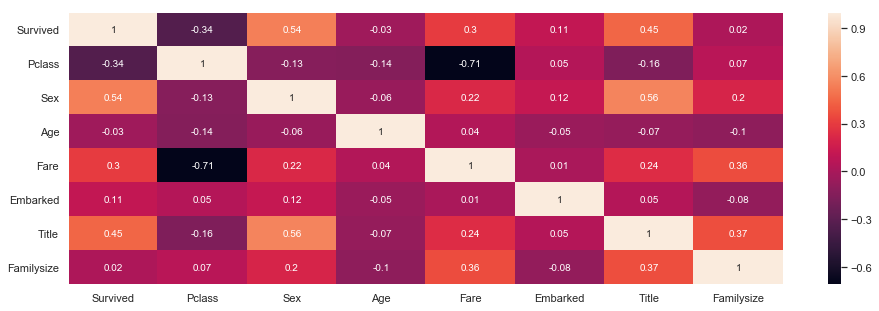

In [29]:
correlation_matrix = train.corr().round(2)
plt.figure(figsize = (16,5))
sns.heatmap(data=correlation_matrix, annot=True)

From the heatmaps we can see that **Fare** has the highest correlation with survivality followed by **Pclass, Sex and Title**

In [30]:
#Slice Target feature from training data set

target = train['Survived']
train = train.drop('Survived', axis=1)

## 2. Modelling

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn import model_selection

import numpy as np

In [32]:
# Set models array and its parameter

rand_state = 15
models = []
models.append(("Logistic Regression", LogisticRegression(random_state=rand_state)))
models.append(("KNN", KNeighborsClassifier(n_neighbors=rand_state)))
models.append(("Decision Tree", DecisionTreeClassifier(random_state=rand_state)))
models.append(("Random Forest", RandomForestClassifier(random_state=rand_state)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=rand_state)))
models.append(("Gradient Boosting", GradientBoostingClassifier(random_state=rand_state)))
models.append(("XG Boosting", xgb.XGBClassifier()))
models.append(("SVM", SVC(random_state=rand_state)))

In [33]:
# Train the data using k-fold cross validation

kfold = model_selection.KFold(n_splits=10)
model_name = []
model_avgscore = []

In [40]:
for name, model in models:
    cv_results = model_selection.cross_val_score(model,train,target,scoring="accuracy",cv=kfold)
    print("\n"+name)
    print("Avg_score : "+str(cv_results.mean()))
    model_name.append(name)
    model_avgscore.append(cv_results.mean())


Logistic Regression
Avg_score : 0.7968414481897628

KNN
Avg_score : 0.8170536828963796

Decision Tree
Avg_score : 0.7991011235955056

Random Forest
Avg_score : 0.8035955056179775

AdaBoost
Avg_score : 0.8002372034956304

Gradient Boosting
Avg_score : 0.8238077403245943

XG Boosting
Avg_score : 0.8226966292134831

SVM
Avg_score : 0.8238077403245944


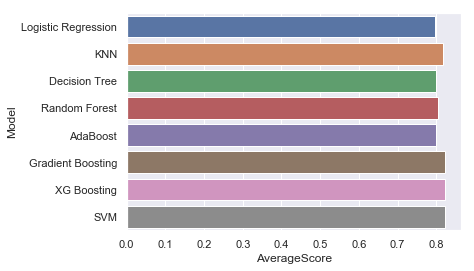

In [35]:
# Visualize the result

cv_df = pd.DataFrame({"AverageScore":model_avgscore,"Model":model_name})
sns.barplot("AverageScore","Model",data=cv_df,)

In [36]:
best_model = cv_df.sort_values(by="AverageScore",ascending=False).iloc[0]

In [37]:
print("Best Model = "+best_model.Model)
print("Average Score = "+str(best_model.AverageScore))

Best Model = SVM
Average Score = 0.8238077403245944


## 3. Testing

From modelling score above we choose **SVM Classifier** to predict the result of the test set

In [38]:
svm = SVC()
svm.fit(train,target)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [39]:
test_id = test['PassengerId']
test_data = test.drop('PassengerId', axis=1)
prediction = svm.predict(test_data)

In [48]:
submission = pd.DataFrame({"PassengerId":test_id, "Survived":prediction}).set_index("PassengerId")

In [49]:
submission.to_csv('submission.csv')

In [50]:
submission

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


# References

* [Minsuk Heo Kaggle - Titanic](https://github.com/minsuk-heo/kaggle-titanic)

* [Code A Star Titanic Survivors Data Wrangling](https://codeastar.com/data-wrangling)